In [6]:
# Install if not already
!conda install -c bioconda mummer4


/data/leuven/351/vsc35101/miniconda3/lib/python3.12/site-packages/conda/base/context.py:200: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
/data/leuven/351/vsc35101/miniconda3/lib/python3.12/site-packages/conda/base/context.py:200: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/

## Homology and Whole-Genome Alignment

In [9]:
# Check if nucmer is available
!nucmer --version

# Check other MUMmer tools
!delta-filter --help
!mummerplot --help


4.0.0rc1
delta-filter: invalid option -- '-'

USAGE: delta-filter  [options]  <deltafile>

Try 'delta-filter -h' for more information.

  USAGE: mummerplot  [options]  <match file>

  DESCRIPTION:
    mummerplot generates plots of alignment data produced by mummer, nucmer,
    promer or show-tiling by using the GNU gnuplot utility. After generating
    the appropriate scripts and datafiles, mummerplot will attempt to run
    gnuplot to generate the plot. If this attempt fails, a warning will be
    output and the resulting .gp and .[frh]plot files will remain so that the
    user may run gnuplot independently. If the attempt succeeds, either an x11
    window will be spawned or an additional output file will be generated
    (.ps or .png depending on the selected terminal). Feel free to edit the
    resulting gnuplot script (.gp) and rerun gnuplot to change line thinkness,
    labels, colors, plot size etc.

  MANDATORY:
    match file      Set the alignment input to 'match file'
     

In [11]:
# Create alignment between speciesA and speciesB
!nucmer --prefix=A_vs_B genomes/GCA_000142945.1_ASM14294v1_genomic.fna genomes/GCA_000468175.2_ASM46817v2_genomic.fna
!delta-filter -1 A_vs_B.delta > A_vs_B.filter.delta
!mummerplot --png --fat --filter --layout -p A_vs_B A_vs_B.filter.delta

# Repeat for other pairs:
!nucmer --prefix=A_vs_C genomes/GCA_000142945.1_ASM14294v1_genomic.fna genomes/GCA_002911725.1_ASM291172v1_genomic.fna
!delta-filter -1 A_vs_C.delta > A_vs_C.filter.delta
!mummerplot --png --fat --filter --layout -p A_vs_C A_vs_C.filter.delta

!nucmer --prefix=B_vs_C genomes/GCA_000468175.2_ASM46817v2_genomic.fna genomes/GCA_002911725.1_ASM291172v1_genomic.fna
!delta-filter -1 B_vs_C.delta > B_vs_C.filter.delta
!mummerplot --png --fat --filter --layout -p B_vs_C B_vs_C.filter.delta

Writing filtered delta file A_vs_B.filter
Reading delta file A_vs_B.filter
Writing plot files A_vs_B.fplot, A_vs_B.rplot
Writing gnuplot script A_vs_B.gp
Writing filtered delta file A_vs_C.filter
Reading delta file A_vs_C.filter
Writing plot files A_vs_C.fplot, A_vs_C.rplot
Writing gnuplot script A_vs_C.gp
Writing filtered delta file B_vs_C.filter
Reading delta file B_vs_C.filter
Writing plot files B_vs_C.fplot, B_vs_C.rplot
Writing gnuplot script B_vs_C.gp


## Generate visualization of Homology and Whole-Genome Alignment

- Tool: MUMmer4 
- Goal: Detect homologous regions, structural rearrangements, synteny blocks.
- Outputs: Dotplots for synteny


In [13]:
!gnuplot A_vs_B.gp

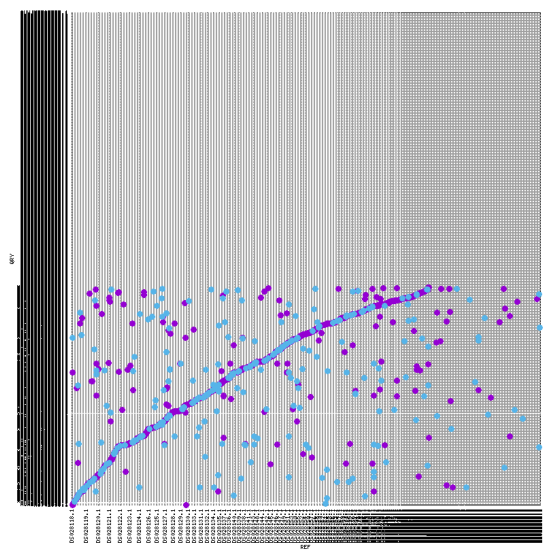

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('A_vs_B.png')
plt.figure(figsize=(10, 10))  
plt.imshow(img)
plt.axis('off') 
plt.show()


The MUMmerplot dotplot illustrates the genomic alignment between two species, highlighting regions of sequence similarity and structural variation. The prominent blue diagonal line from the bottom left to the top right indicates a strong level of synteny, suggesting that large portions of the two genomes are conserved in both sequence and gene order. This reflects a close evolutionary relationship or limited genomic rearrangement between the species. The presence of scattered purple and blue dots off the main diagonal signifies local sequence similarities that are either rearranged, inverted (as shown by the purple color), or fragmented due to assembly differences. The abundance of vertical and horizontal tick marks along both axes represents numerous contigs or scaffolds, suggesting that the genome assemblies used are fragmented. Overall, the plot supports a high degree of homology between the species, with some evidence of genomic inversions and structural variations that merit further investigation.

In [14]:
!gnuplot A_vs_C.gp

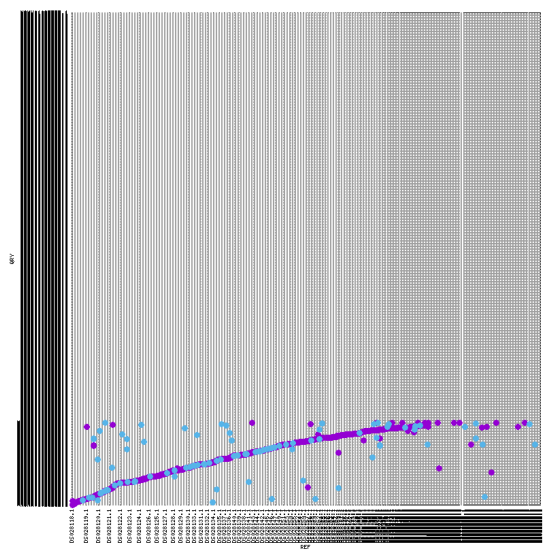

In [17]:
img = mpimg.imread('A_vs_C.png')
plt.figure(figsize=(10, 10))  
plt.imshow(img)
plt.axis('off')  
plt.show()


In [15]:
!gnuplot B_vs_C.gp

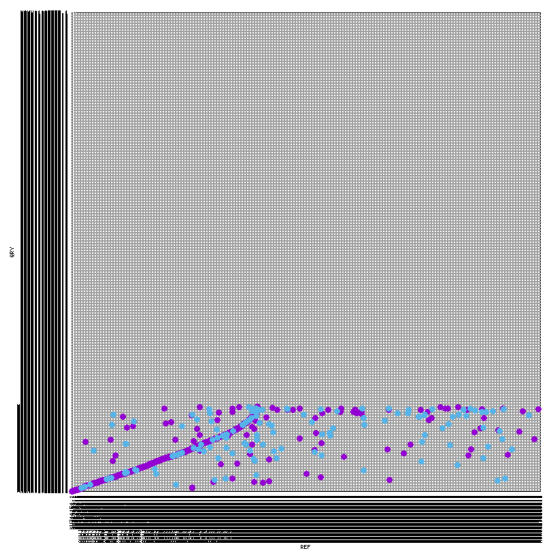

In [18]:
img = mpimg.imread('B_vs_C.png')
plt.figure(figsize=(10, 10))  
plt.imshow(img)
plt.axis('off')  
plt.show()


add analysis results of three species

Next steps:
1.  GC Content, Genome Size, CDS Stats
tools: QUAST, BBMap, or seqkit for
outputs: genome size, GC content, number of CDS, N50/L50 if contigs are used

2. Phylogenetic tree construction
tools: IQ-TREE, RAxML, or FastTree (based on core gene alignments)
look at evolutionary relationships among the three species
outputs: phylogenetic tree, bootstrapping values, cladogram visualization

3. Orthologous gene clustering
Group genes into orthologs, identify gene gain/loss events, and species-specific genes.
tools: OrthoFinder, OrthoMCL, or Roary (if annotations are available)
outputs: Gene family matrix, venn diagram of shared/unique gene clusters, tree of orthologous relationships

4. 

In [ ]:
# Install seqkit 
!conda install -c bioconda seqkit

# Basic info: GC content, number of sequences, total size
!seqkit stats genomes/*.fna


/data/leuven/351/vsc35101/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
Retrieving notices: done
/data/leuven/351/vsc35101/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.co